<a href="https://colab.research.google.com/github/Jarmos-san/PumpItUp/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DrivenData Competition | Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

Using data from Taarifa and the Tanzanian Ministry of Water, can you **predict which pumps are functional**, which **need some repairs**, and which **don't work at all**? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of **pump is operating**, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

# Importing Necessary Libraries

In [41]:
# Loading necessary libraries
import pandas as pd
import missingno
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the version for easier debugging at some point of time.
# print(f'Python v{python3.__version__}')
print(f'Pandas v{pd.__version__}')
print(f'Missingno v{missingno.__version__}')
print(f'Numpy v{np.__version__}')
print(f'Seaborn v{sns.__version__}')

# Instantiating a GDrive mount
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/PumpItUp/data
%matplotlib inline
sns.set_style(style='darkgrid')

Pandas v0.25.3
Missingno v0.4.2
Numpy v1.17.5
Seaborn v0.10.0
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/PumpItUp/data


# Loading Files

In [42]:
FILEPATH = '/content/gdrive/My Drive/PumpItUp/data/'

# Load .csv files
TestData = pd.read_csv(f'{FILEPATH}TestData')
TrainData = pd.read_csv(f'{FILEPATH}TrainData')

print(f'The Training Set has {TrainData.shape[0]} rows & {TrainData.shape[1]} columns.')
print(f'The Testing Set has {TestData.shape[0]} rows & {TestData.shape[1]} columns.')

The Training Set has 59400 rows & 41 columns.
The Testing Set has 14850 rows & 40 columns.


# Exploratory Data Analysis

## Inferences

In [43]:
TrainData.sample()

,ID,TSHAmount,DateRecorded,Funder,GPSHeight,Installer,Longitutde,Latitude,WaterPointName,PrivateNum,Basin,SubVillage,Region,RegionCode,DistrictCode,LocalGovernmentArea,Ward,Population,PublicMeeting,RecordedBy,SchemeManagement,SchemeName,Permit,ConstructionYear,ExtractionType,ExtractionTypeGroup,ExtractionTypeClass,Management,ManagementGroup,Payment,PaymentType,WaterQuality,QualityGroup,Quantity,QuantityGroup,Source,SourceType,SourceClass,WaterPointType,WaterPointTypeGroup,StatusGroup
12472,53359,100.0,2011-03-04,Government Of Tanzania,478,DWE,38.30997,-4.424544,Kwz Masumbuko,0,Pangani,Videngelesa,Tanga,4,1,Lushoto,Mnazi,1,True,GeoData Consultants Ltd,VWC,Makiyui stream,True,1973.0,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


In [44]:
TrainData.describe()

,ID,TSHAmount,GPSHeight,Longitutde,Latitude,PrivateNum,RegionCode,DistrictCode,Population,ConstructionYear
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,38691.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1996.814686
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,12.472045
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,1987.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,2000.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [45]:
TrainData.describe(include='all')

,ID,TSHAmount,DateRecorded,Funder,GPSHeight,Installer,Longitutde,Latitude,WaterPointName,PrivateNum,Basin,SubVillage,Region,RegionCode,DistrictCode,LocalGovernmentArea,Ward,Population,PublicMeeting,RecordedBy,SchemeManagement,SchemeName,Permit,ConstructionYear,ExtractionType,ExtractionTypeGroup,ExtractionTypeClass,Management,ManagementGroup,Payment,PaymentType,WaterQuality,QualityGroup,Quantity,QuantityGroup,Source,SourceType,SourceClass,WaterPointType,WaterPointTypeGroup,StatusGroup
count,59400.000000,59400.000000,59400,55765,59400.000000,55745,59400.000000,5.940000e+04,59400,59400.000000,59400,59029,59400,59400.000000,59400.000000,59400,59400,59400.000000,56066,59400,55523,31234,56344,38691.000000,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1897,NaN,2145,NaN,NaN,37400,NaN,9,19287,21,NaN,NaN,125,2092,NaN,2,1,12,2696,2,NaN,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,Lake Victoria,Madukani,Iringa,NaN,NaN,Njombe,Igosi,NaN,True,GeoData Consultants Ltd,VWC,K,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,10248,508,5294,NaN,NaN,2503,307,NaN,51011,59400,36793,682,38852,NaN,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,NaN,NaN,NaN,15.297003,5.629747,NaN,NaN,179.909983,NaN,NaN,NaN,NaN,NaN,1996.814686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,NaN,NaN,NaN,17.587406,9.633649,NaN,NaN,471.482176,NaN,NaN,NaN,NaN,NaN,12.472045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1987.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,NaN,NaN,NaN,12.000000,3.000000,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,NaN,NaN,NaN,17.000000,5.000000,NaN,NaN,215.000000,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- It appears that `Population`, `ConstructionYear` has some missing values that are written as `0`.

## Visualizations

In [0]:
def valueCounts(column, DataFrame=TrainData):
    """
    A function to return an output with the count and percentage value of the 
    distributions.

    Argument
    ---------
    column: Takes in single column from the DataFrame.

    Returns
    ---------
    Count and percentage of the distributions
    """

    plt.title('Number of Status Groups in the Data Set')

    for index, value in column.value_counts().items():
        print(f'{index}: {value}({round((value/column.shape[0])*100)}%)')
    print()

    return sns.countplot(x=column, data=DataFrame)

functional: 32259(54%)
non functional: 22824(38%)
functional needs repair: 4317(7%)



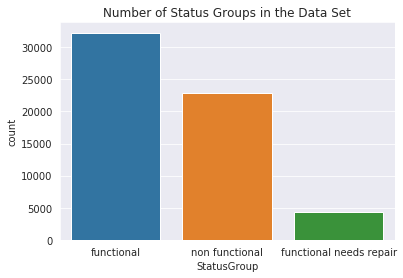

In [62]:
valueCounts(TrainData['StatusGroup'])

- Slightly over half of all the pumps are operational while slightly less than two-fifths have completely broken down & only a handful requires some repair.

True: 38852(65%)
False: 17492(29%)



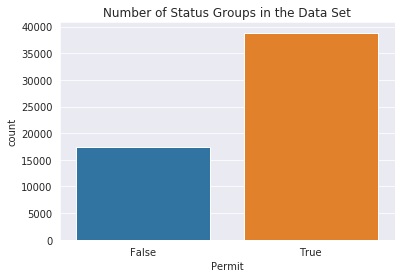

In [63]:
valueCounts(TrainData['Permit'])

Lake Victoria: 10248(17%)
Pangani: 8940(15%)
Rufiji: 7976(13%)
Internal: 7785(13%)
Lake Tanganyika: 6432(11%)
Wami / Ruvu: 5987(10%)
Lake Nyasa: 5085(9%)
Ruvuma / Southern Coast: 4493(8%)
Lake Rukwa: 2454(4%)



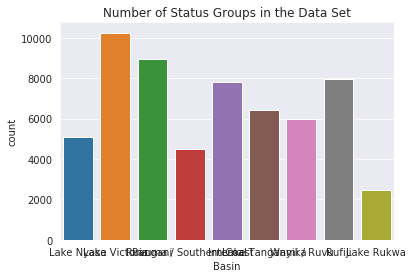

In [64]:
valueCounts(TrainData['Basin'])

Iringa: 5294(9%)
Shinyanga: 4982(8%)
Mbeya: 4639(8%)
Kilimanjaro: 4379(7%)
Morogoro: 4006(7%)
Arusha: 3350(6%)
Kagera: 3316(6%)
Mwanza: 3102(5%)
Kigoma: 2816(5%)
Ruvuma: 2640(4%)
Pwani: 2635(4%)
Tanga: 2547(4%)
Dodoma: 2201(4%)
Singida: 2093(4%)
Mara: 1969(3%)
Tabora: 1959(3%)
Rukwa: 1808(3%)
Mtwara: 1730(3%)
Manyara: 1583(3%)
Lindi: 1546(3%)
Dar es Salaam: 805(1%)



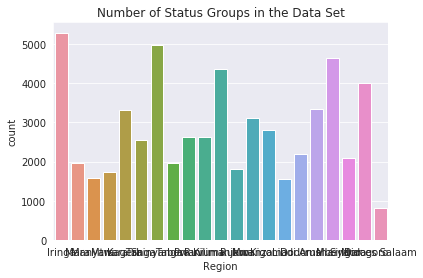

In [65]:
valueCounts(TrainData['Region'])

gravity: 26780(45%)
handpump: 16456(28%)
other: 6430(11%)
submersible: 6179(10%)
motorpump: 2987(5%)
rope pump: 451(1%)
wind-powered: 117(0%)



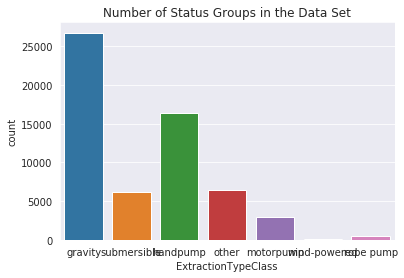

In [66]:
valueCounts(TrainData['ExtractionTypeClass'])

user-group: 52490(88%)
commercial: 3638(6%)
parastatal: 1768(3%)
other: 943(2%)
unknown: 561(1%)



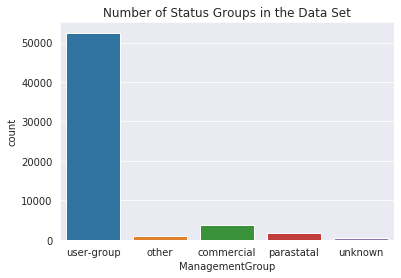

In [67]:
valueCounts(TrainData['ManagementGroup'])

never pay: 25348(43%)
pay per bucket: 8985(15%)
pay monthly: 8300(14%)
unknown: 8157(14%)
pay when scheme fails: 3914(7%)
pay annually: 3642(6%)
other: 1054(2%)



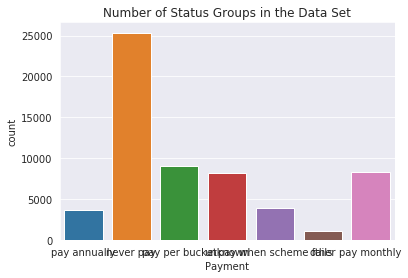

In [68]:
valueCounts(TrainData['Payment'])

soft: 50818(86%)
salty: 4856(8%)
unknown: 1876(3%)
milky: 804(1%)
coloured: 490(1%)
salty abandoned: 339(1%)
fluoride: 200(0%)
fluoride abandoned: 17(0%)



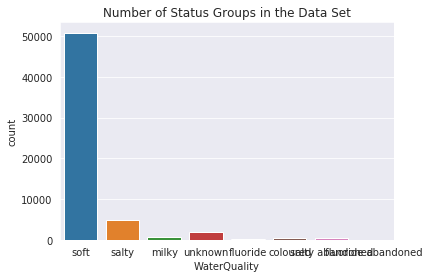

In [69]:
valueCounts(TrainData['WaterQuality'])

enough: 33186(56%)
insufficient: 15129(25%)
dry: 6246(11%)
seasonal: 4050(7%)
unknown: 789(1%)



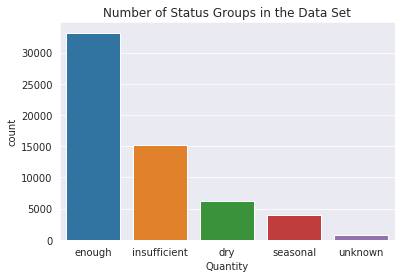

In [70]:
valueCounts(TrainData['Quantity'])

spring: 17021(29%)
shallow well: 16824(28%)
machine dbh: 11075(19%)
river: 9612(16%)
rainwater harvesting: 2295(4%)
hand dtw: 874(1%)
lake: 765(1%)
dam: 656(1%)
other: 212(0%)
unknown: 66(0%)



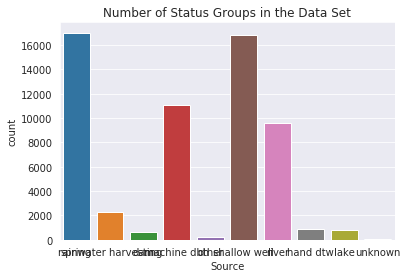

In [71]:
valueCounts(TrainData['Source'])